# Ujian Modul 2
[link](https://github.com/LintangWisesa/Ujian_AnalyticsVisualization_JCDS08)
## Soal 2 - World Happiness

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


### Soal 2 - Nomor 1
### Menghitung

1. Mean, Median dan Modus
2. Range, Q1, Q3 dan IQR
3. Standard Deviasi & Variance

In [4]:
numcol = df.iloc[:,1:].select_dtypes(include='number').columns
numcol

Index(['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [5]:
nilaimean = [df[col].mean() for col in numcol]
nilaimedian = [df[col].median() for col in numcol]
nilaimodus = [df[col].mode()[0] for col in numcol]
nilairange = [df[col].max() - df[col].min() for col in numcol]
q1 = [df[col].quantile(0.25) for col in numcol]
q3 = [df[col].quantile(0.75) for col in numcol]
iqr = np.array(q3)-np.array(q1)
nilaistd = [df[col].std() for col in numcol]
nilaivar = [df[col].var() for col in numcol]

namakolom = ['mean', 'median', 'modus', 'range', 'Q1', 'Q3', 'IQR', 'std', 'var']
nilaikolom = [nilaimean, nilaimedian, nilaimodus, nilairange, q1, q3, iqr, nilaistd, nilaivar]

tabel = pd.DataFrame()
for nama, nilai in zip(namakolom, nilaikolom):
    tabel[nama] = nilai

In [6]:
tabel.set_index(numcol, inplace=True)

In [7]:
tabel

,mean,median,modus,range,Q1,Q3,IQR,std,var
Score,5.407096,5.3795,5.208,4.916,4.54450,6.18450,1.64000,1.113120,1.239036
GDP per capita,0.905147,0.9600,0.960,1.684,0.60275,1.23250,0.62975,0.398389,0.158714
Social support,1.208814,1.2715,1.465,1.624,1.05575,1.45250,0.39675,0.299191,0.089515
Healthy life expectancy,0.725244,0.7890,0.815,1.141,0.54775,0.88175,0.33400,0.242124,0.058624
Freedom to make life choices,0.392571,0.4170,0.498,0.631,0.30800,0.50725,0.19925,0.143289,0.020532
Generosity,0.184846,0.1775,0.153,0.566,0.10875,0.24825,0.13950,0.095254,0.009073
Perceptions of corruption,0.110603,0.0855,0.028,0.453,0.04700,0.14125,0.09425,0.094538,0.008937


### Z-score tiap data point

In [8]:
import scipy.stats as stats

tabel2 = df[numcol].apply(stats.zscore)
tabel2.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2.128711,1.095042,1.268098,1.080422,1.424282,-0.335404,2.996757
1,1.976397,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
2,1.934938,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941
3,1.880862,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500
4,1.875454,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632


### Soal 2 - Nomor 2
### Cek outliers

In [9]:
np.where((df.Score > (tabel.loc['Score', 'Q3']+1.5*tabel.loc['Score', 'IQR'])) | (df.Score < (tabel.loc['Score', 'Q1']-1.5*tabel.loc['Score', 'IQR'])))

(array([], dtype=int64),)

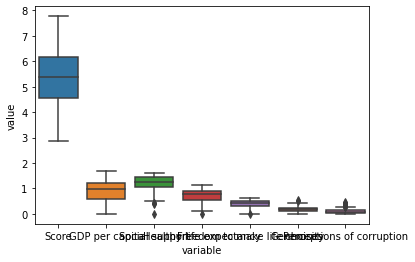

In [10]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[numcol]))
plt.show()

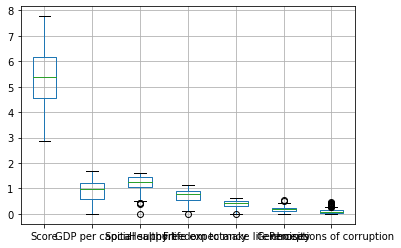

In [11]:
df[numcol].boxplot()
plt.show()

### Outliers berdasarkan IQR

In [12]:
outliers = []
for col in numcol:
    a = np.where((df[col] > (tabel.loc[col, 'Q3']+1.5*tabel.loc[col, 'IQR'])) | (df[col] < (tabel.loc[col, 'Q1'] -1.5*tabel.loc[col, 'IQR'])))
    outliers.append(a)

In [13]:
outliers

[(array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([101, 144, 148, 154], dtype=int64),),
 (array([134], dtype=int64),),
 (array([153], dtype=int64),),
 (array([ 91, 130], dtype=int64),),
 (array([  0,   1,   2,   4,   5,   6,   7,   8,  10,  13,  15,  33,  75,
         151], dtype=int64),)]

In [14]:
for i, col in enumerate(numcol):
    if outliers[i][0].size > 0:
        print(f'Outliers di kolom "{col}" ({outliers[i][0].size}): {np.array(df[col])[outliers[i]]}')
    else: continue

Outliers di kolom "Social support" (4): [0.437 0.447 0.378 0.   ]
Outliers di kolom "Healthy life expectancy" (1): [0.]
Outliers di kolom "Freedom to make life choices" (1): [0.]
Outliers di kolom "Generosity" (2): [0.498 0.566]
Outliers di kolom "Perceptions of corruption" (14): [0.393 0.41  0.341 0.298 0.343 0.373 0.38  0.308 0.29  0.316 0.31  0.453
 0.287 0.411]


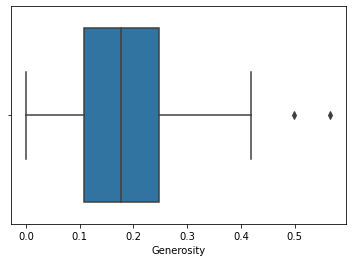

In [15]:
sns.boxplot(x='Generosity', data=df)
plt.show()

### Outliers berdasarkan z-score

In [16]:
outliers2 = []
for col in numcol:
    a = np.where((tabel2[col] > 3) | (tabel2[col] < -3))
    outliers2.append(a)

In [17]:
outliers2

[(array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([154], dtype=int64),),
 (array([134], dtype=int64),),
 (array([], dtype=int64),),
 (array([ 91, 130], dtype=int64),),
 (array([  1,  33, 151], dtype=int64),)]

In [18]:
for i, col in enumerate(numcol):
    if outliers2[i][0].size > 0:
        print(f'Outliers di kolom "{col}" ({outliers2[i][0].size}): {np.array(df[col])[outliers2[i]]}')
    else: continue

Outliers di kolom "Social support" (1): [0.]
Outliers di kolom "Healthy life expectancy" (1): [0.]
Outliers di kolom "Generosity" (2): [0.498 0.566]
Outliers di kolom "Perceptions of corruption" (3): [0.41  0.453 0.411]


### Soal 2 - Nomor 3

In [19]:
sns.set()

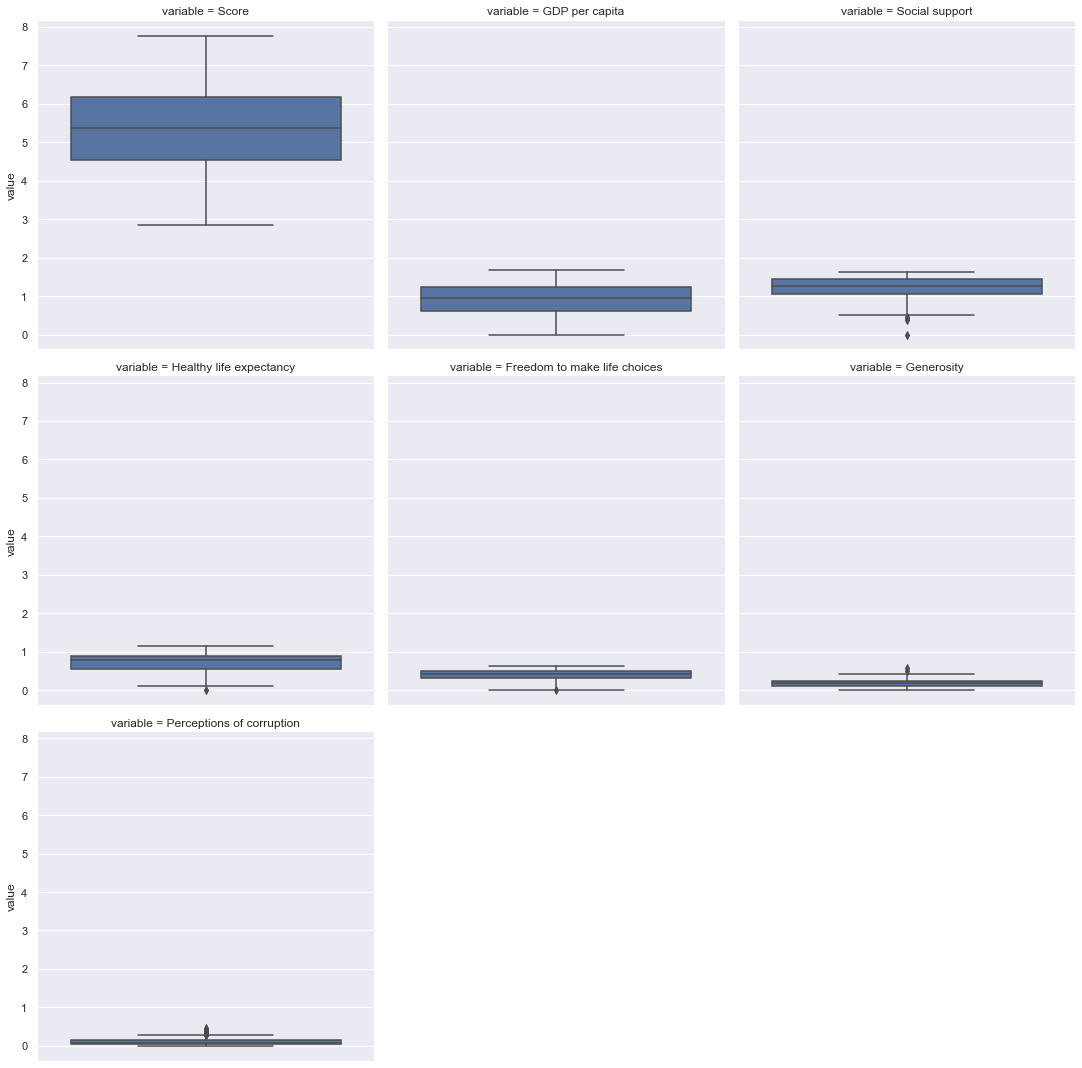

In [20]:
sns.catplot(kind='box', y='value', data=pd.melt(df[numcol]), col='variable', col_wrap=3)
# sns.boxplot(x="variable", y="value", data=pd.melt(df[numcol]))
plt.show()

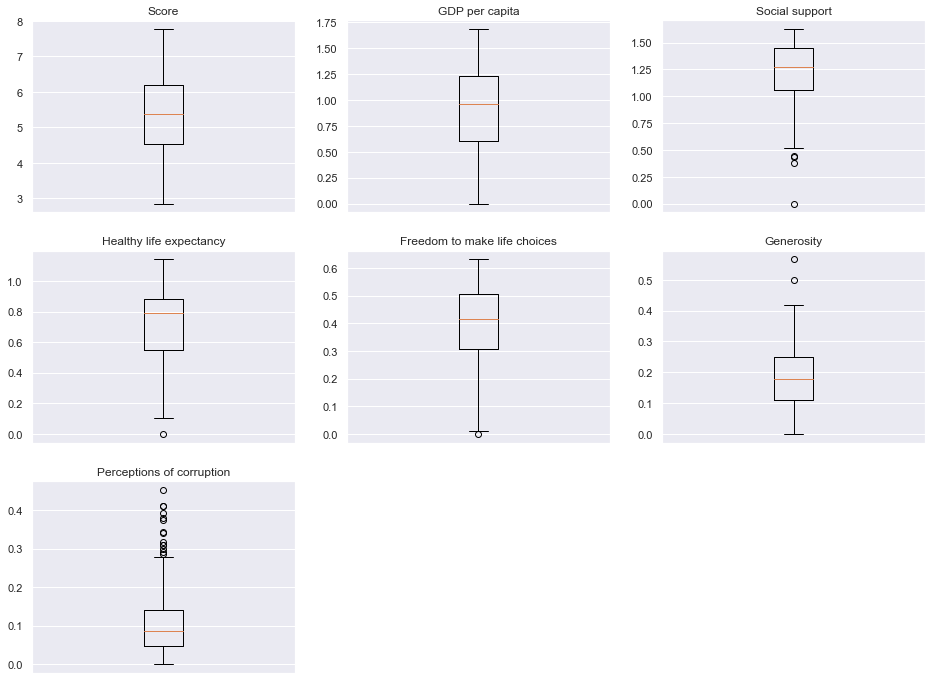

In [21]:
plt.figure(figsize=(16,12))
for i, col in enumerate(numcol):
    plt.subplot(3,3,i+1)
    plt.boxplot(df[col])
    plt.xticks([0], [''])
    plt.title(col)
plt.show()

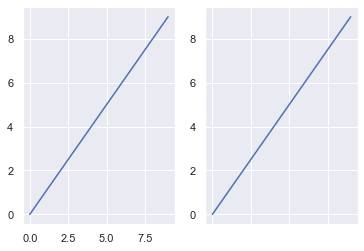

In [22]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(range(10))
plt.subplot(1,2,2)
plt.plot(range(10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

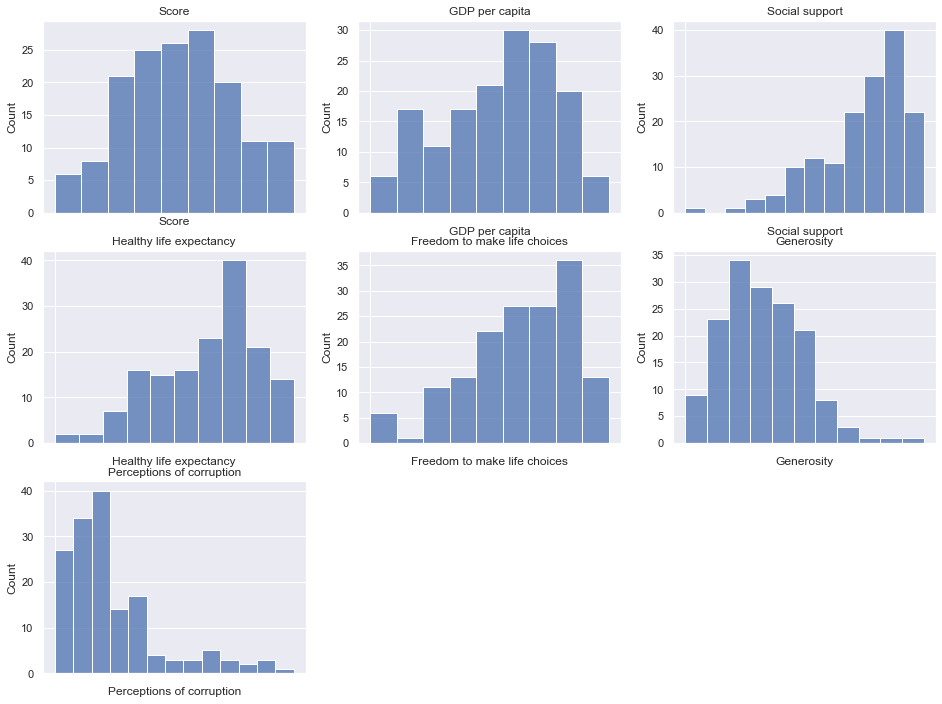

In [23]:
plt.figure(figsize=(16,12))
for i, col in enumerate(numcol):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col])
    plt.xticks([0], [''])
    plt.title(col)
plt.show()

### Soal 2 - Nomor 4

In [46]:
for col in numcol:
    if col != 'Score':
        print(f'Covariance between "Score" and "{col}": {np.cov(df[col], df.Score, bias=True)[0][1]:.3f}')
# np.cov(df['Generosity'], df.Score, bias=True) ##???

Covariance between "Score" and "GDP per capita": 0.350
Covariance between "Score" and "Social support": 0.257
Covariance between "Score" and "Healthy life expectancy": 0.209
Covariance between "Score" and "Freedom to make life choices": 0.090
Covariance between "Score" and "Generosity": 0.008
Covariance between "Score" and "Perceptions of corruption": 0.040


In [24]:
df[numcol].corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


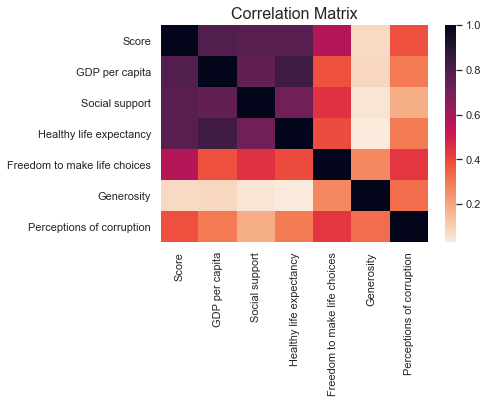

In [25]:
korelasi = df[numcol].corr().abs()
cmap = sns.cm.rocket_r
ax = sns.heatmap(korelasi, cmap = cmap)
plt.title('Correlation Matrix', fontsize=16);

In [26]:
df[numcol].corr(method='spearman')

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.814483,0.816181,0.807275,0.551974,0.070483,0.217348
GDP per capita,0.814483,1.000000,0.768539,0.851513,0.393426,-0.041304,0.223203
Social support,0.816181,0.768539,1.000000,0.725997,0.449491,0.007695,0.114017
Healthy life expectancy,0.807275,0.851513,0.725997,1.000000,0.412906,-0.006773,0.165309
Freedom to make life choices,0.551974,0.393426,0.449491,0.412906,1.000000,0.324146,0.403586
Generosity,0.070483,-0.041304,0.007695,-0.006773,0.324146,1.000000,0.286171
Perceptions of corruption,0.217348,0.223203,0.114017,0.165309,0.403586,0.286171,1.000000


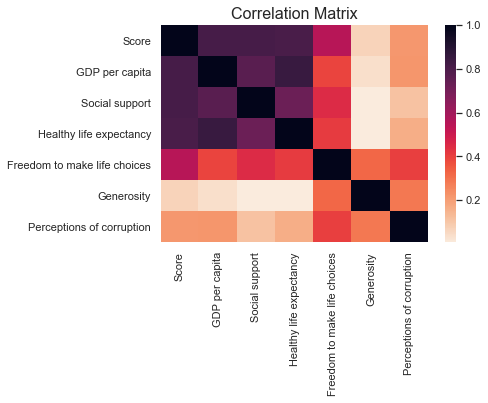

In [27]:
korelasi_spearman = df[numcol].corr(method='spearman').abs()
cmap = sns.cm.rocket_r
ax = sns.heatmap(korelasi_spearman, cmap = cmap)
plt.title('Correlation Matrix', fontsize=16);

In [28]:
df[numcol].corr(method='kendall')

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.619993,0.616792,0.602613,0.394203,0.043759,0.140974
GDP per capita,0.619993,1.000000,0.569193,0.655693,0.270837,-0.042451,0.135225
Social support,0.616792,0.569193,1.000000,0.529983,0.319566,0.000746,0.070270
Healthy life expectancy,0.602613,0.655693,0.529983,1.000000,0.288418,-0.004901,0.106295
Freedom to make life choices,0.394203,0.270837,0.319566,0.288418,1.000000,0.226187,0.277792
Generosity,0.043759,-0.042451,0.000746,-0.004901,0.226187,1.000000,0.188933
Perceptions of corruption,0.140974,0.135225,0.070270,0.106295,0.277792,0.188933,1.000000


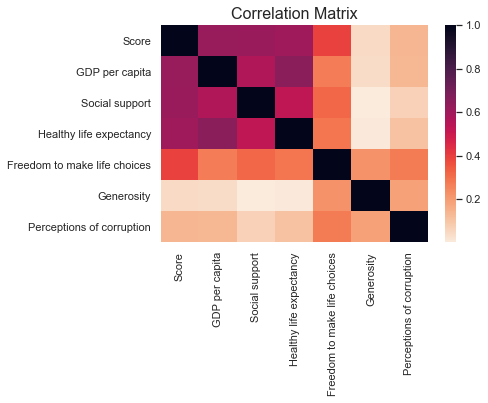

In [29]:
korelasi_kendall = df[numcol].corr(method='kendall').abs()
cmap = sns.cm.rocket_r
ax = sns.heatmap(korelasi_kendall, cmap = cmap)
plt.title('Correlation Matrix', fontsize=16);

### Soal 2 - Nomor 5

Visualisasikan dalam bentuk bar chart data berikut:

1. 10 Negara dengan GDP per capita tertinggi.
2. 10 Negara dengan Healthy life expectancy tertinggi.
3. 10 Negara dengan Perceptions of corruption tertinggi.

In [30]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [31]:
df['Country or region'].nunique()

156

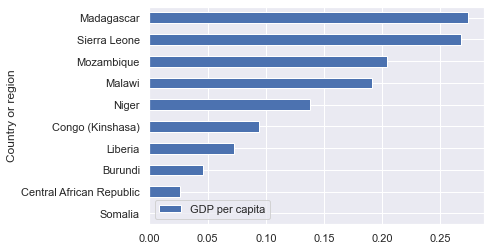

In [32]:
df[['Country or region', 'GDP per capita']].sort_values(by='GDP per capita', ascending=True).head(10).set_index('Country or region').plot.barh()
plt.show()

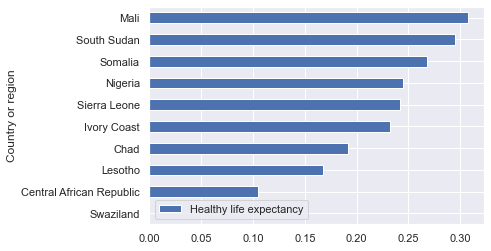

In [33]:
df[['Country or region', 'Healthy life expectancy']].sort_values(by='Healthy life expectancy', ascending=True).head(10).set_index('Country or region').plot.barh()
plt.show()

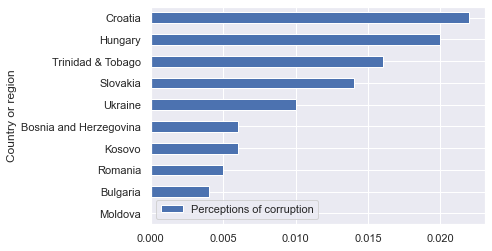

In [35]:
df[['Country or region', 'Perceptions of corruption']].sort_values(by='Perceptions of corruption', ascending=True).head(10).set_index('Country or region').plot.barh()
plt.show()